# Refactor Public Goods Game
- Update_contributions_function now run for one player since I plan to add different decision rules for different types of players

## Overall TODOS

In [214]:
# Added specified player type proportions (population wide / or within groups if I am staying with group_size == 4 num_membership == 2)
# Completed 

#TODO Implement improved player-types (altruist and freerider) for split endowment case (make them a little more responsive versus totally static and identical) 
# aka varying degrees of altruism : debating this one – for behavioral / lab results reasons 

#DID Add player types and improved decision rule(s) for shared endowment case 
# Started on. The current decison rule works. Want to improve it even more
# M-20 Improved on it even more. Added between-group comparison for SHARED endowment.

#TODO
# I now want to change the type of randomness used. Rather than a uniform distribution, maybe something with a tail, etc. 

#TODO Behavior Issue. Check current output. Currently, very drastic changes in the first round, but then almost no changes occur later on. This should be worked on.

#TODO Additional issue : I do not think my scale factor is not working properly

#DID Initialize contributions for SHARED endowment case with player types
# Completed

#DID Fix Simulate Game Function for Shared Endowment Case
# Completed

#DID Improve the way my csv file looks and make sure it works with the monte carlo simulation portion (I think I am only saving the final iterations data as it stands)
# Completed. It now saves data from all iterations of the Simulation. HOWEVER !!!

## Completed Switch from numpyarray for MOI ==> Pandas DF. to_csv, as well as naming the rows/columns will be of
# great importance for my capacity to use the data in the future 
# Did, but now I cannot open the CSV FILE PROPERLY

#TODO Once I do the above, I can make better graphs that show (1) average group level cooperation, (2) average player level coop, (3) average round level coop, etc.

#TODO design in a way to allow for specific comparissons between the nature of the endowment (SHARED == 0/1) with same parameter sets 

#TODO parameterize to explore the parameter space

#TODO implement power analysis by estimating effect size given the information that I am storing 

#TODO I would be interested in creating some visual component for displaying the change of cooperation of time given different parameter sets -- potentially with
# a scroller feature 

# Import Utils

In [6]:
from src.public_goods_utils import *
import pandas as pd
import matplotlib.pyplot as plt

### Testing Above Functions

In [8]:
player_types_matrix = initialize_player_types(NUM_PLAYERS,update_contributions_split_dict, METHOD = 'conditional')
player_types_matrix

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
#player_types_matrix = np.ones([NUM_PLAYERS,1])
contributions_example = initailize_contribtions_with_player_types(NUM_PLAYERS, NUM_MEMBERSHIP, ENDOWMENT, SHARED, player_types_matrix)
groups_example = formed_groups_matrix(GROUP_SIZE, NUM_GROUPS)
scaled_good_example = calculuate_scaled_public_good(contributions_example, groups_example, NUM_PLAYERS, R)
payoff_split_example = calculate_payoff_split(contributions_example, groups_example, ENDOWMENT, scaled_good_example)

In [10]:
print(contributions_example)
updated_contributions = update_contributions_split(player_types_matrix, contributions_example, payoff_split_example, groups_example, ENDOWMENT, NUM_MEMBERSHIP)
print("New")
updated_contributions

[[32. 17.]
 [39.  3.]
 [37.  8.]
 [26. 24.]
 [22. 19.]
 [36.  3.]
 [23. 27.]
 [24. 24.]
 [24.  6.]
 [15. 16.]
 [28. 21.]
 [31.  6.]
 [19. 22.]
 [30. 11.]
 [33. 15.]
 [21. 19.]]
New


array([[ 3., 17.],
       [25., 14.],
       [18., 11.],
       [13., 15.],
       [16.,  2.],
       [25., 11.],
       [18.,  3.],
       [16.,  9.],
       [ 7.,  1.],
       [11.,  9.],
       [ 8.,  8.],
       [13.,  2.],
       [18.,  5.],
       [11.,  7.],
       [22.,  5.],
       [11., 17.]])

In [ ]:
groups_example = formed_groups_matrix(GROUP_SIZE, NUM_GROUPS)
np.argwhere(groups_example == 1) # GOOD FOR VECTORIZING LATER; gives me indices of what groups ppl are in. Will no longer need to use for loop

### Testing above functions 

In [12]:
player_types_matrix = initialize_player_types(NUM_PLAYERS, update_contributions_split_dict, METHOD = 'conditional')
contributions_example = initailize_contribtions_with_player_types(NUM_PLAYERS, NUM_MEMBERSHIP, ENDOWMENT, SHARED, player_types_matrix)
scaled_public_good = calculuate_scaled_public_good(contributions_example, groups_example, NUM_PLAYERS, R)
shared_payoff_example = calculate_payoff_shared(contributions_example, groups_example, ENDOWMENT, scaled_public_good)
print(shared_payoff_example)
print(contributions_example)
print('New')

updated_contributions = update_contributions_shared(player_types_matrix, contributions_example, shared_payoff_example, groups_example, ENDOWMENT, NUM_MEMBERSHIP)
updated_contributions
#updated_contributions = update_contributions_shared_conditional(1, contributions_example, shared_payoff_example, groups_example, ENDOWMENT, NUM_MEMBERSHIP)
#updated_contributions[1]

[[ -2.875   0.625   0.      0.      0.      0.      0.      0.   ]
 [-20.875   0.      6.5     0.      0.      0.      0.      0.   ]
 [ -7.875   0.      0.     -9.625   0.      0.      0.      0.   ]
 [ -8.875   0.      0.      0.      1.5     0.      0.      0.   ]
 [  0.    -29.375   0.      0.      0.      2.5     0.      0.   ]
 [  0.    -19.375   0.      0.      0.      0.      2.125   0.   ]
 [  0.     -6.375   0.      0.      0.      0.      0.    -24.875]
 [  0.      0.     -3.5     0.      0.    -21.5     0.      0.   ]
 [  0.      0.    -29.5     0.      0.      0.     -1.875   0.   ]
 [  0.      0.    -11.5     0.      0.      0.      0.      4.125]
 [  0.      0.      0.    -26.625   0.     -1.5     0.      0.   ]
 [  0.      0.      0.      9.375   0.      0.    -28.875   0.   ]
 [  0.      0.      0.    -22.625   0.      0.      0.     -4.875]
 [  0.      0.      0.      0.      1.5   -17.5     0.      0.   ]
 [  0.      0.      0.      0.    -15.5     0.      4.125   0.

array([[ -3.,  24.],
       [ 18.,  21.],
       [ 18.,  11.],
       [ 12.,  14.],
       [ 20.,  15.],
       [  0.,  28.],
       [ 14.,   0.],
       [ 13.,  12.],
       [ 24.,  12.],
       [-25.,  75.],
       [ 16.,  12.],
       [  8.,  15.],
       [  6.,   7.],
       [ 14.,   5.],
       [ 20.,  21.],
       [ 23.,  18.]])

## Play the game

In [13]:
def metrics_of_interest_array_builder(NUM_GROUPS, GROUP_SIZE):
    metrics_of_interest_array = formed_groups_matrix(GROUP_SIZE, NUM_GROUPS)
    metrics_of_interest_array[metrics_of_interest_array==0] = 'nan'

    return metrics_of_interest_array

In [14]:
def update_metrics_of_interest(metrics_of_interest_array, contributions_matrix):
    for player in range(NUM_PLAYERS):
        contribution_index = 0
        for group in range(NUM_GROUPS):
            if contribution_index == NUM_MEMBERSHIP:
                break
            if metrics_of_interest_array[player][group] == 1:
                metrics_of_interest_array[player][group] = contributions_matrix[player][contribution_index]
                contribution_index += 1
    group_means = np.nanmean(metrics_of_interest_array, axis = 0, keepdims = True) # sum of columns
    metrics_of_interest_array = np.append(metrics_of_interest_array, group_means, axis = 0)
    
    player_means = np.nanmean(metrics_of_interest_array, axis = 1, keepdims = True) # sum of rows
    metrics_of_interest_array = np.append(metrics_of_interest_array, player_means, axis = 1)

    metrics_of_interest_df = pd.DataFrame(metrics_of_interest_array)
    column_dict, row_dict = {}, {}
    for group in range(NUM_GROUPS):
        column_dict[group] = f"group{group}"
    for player in range(NUM_PLAYERS):
        row_dict[player] = f"player{player}"
    column_dict[NUM_GROUPS] = 'playeravg'
    row_dict[NUM_PLAYERS] = 'groupavg'
    metrics_of_interest_df.rename(columns = column_dict, index = row_dict, inplace=True) 
    # Rather than write to csv each time. Append each to a pandas df and only call the csv to write to it once at the end. 
    # this will make it so I don't have to call the csv file, and it doesn't slow down the code 
    # create a column called player ID, create a column for Round ID

    return metrics_of_interest_df

### Testing above functions

In [15]:
contributions_example

array([[ -3.,  24.],
       [ 18.,  21.],
       [ 18.,  11.],
       [ 12.,  14.],
       [ 20.,  15.],
       [  0.,  28.],
       [ 14.,   0.],
       [ 13.,  12.],
       [ 24.,  12.],
       [-25.,  75.],
       [ 16.,  12.],
       [  8.,  15.],
       [  6.,   7.],
       [ 14.,   5.],
       [ 20.,  21.],
       [ 23.,  18.]])

In [17]:
metrics_example = metrics_of_interest_array_builder(NUM_GROUPS, GROUP_SIZE)
print(metrics_example)
metrics_example = update_metrics_of_interest(metrics_example, contributions_example)
print('New')
metrics_example

[[ 1.  1. nan nan nan nan nan nan]
 [ 1. nan  1. nan nan nan nan nan]
 [ 1. nan nan  1. nan nan nan nan]
 [ 1. nan nan nan  1. nan nan nan]
 [nan  1. nan nan nan  1. nan nan]
 [nan  1. nan nan nan nan  1. nan]
 [nan  1. nan nan nan nan nan  1.]
 [nan nan  1. nan nan  1. nan nan]
 [nan nan  1. nan nan nan  1. nan]
 [nan nan  1. nan nan nan nan  1.]
 [nan nan nan  1. nan  1. nan nan]
 [nan nan nan  1. nan nan  1. nan]
 [nan nan nan  1. nan nan nan  1.]
 [nan nan nan nan  1.  1. nan nan]
 [nan nan nan nan  1. nan  1. nan]
 [nan nan nan nan  1. nan nan  1.]]
New


,group0,group1,group2,group3,group4,group5,group6,group7,playeravg
player0,-3.00,24.0,NaN,NaN,NaN,NaN,NaN,NaN,10.500
player1,18.00,NaN,21.00,NaN,NaN,NaN,NaN,NaN,19.500
player2,18.00,NaN,NaN,11.00,NaN,NaN,NaN,NaN,14.500
player3,12.00,NaN,NaN,NaN,14.00,NaN,NaN,NaN,13.000
player4,NaN,20.0,NaN,NaN,NaN,15.0,NaN,NaN,17.500
player5,NaN,0.0,NaN,NaN,NaN,NaN,28.0,NaN,14.000
player6,NaN,14.0,NaN,NaN,NaN,NaN,NaN,0.0,7.000
player7,NaN,NaN,13.00,NaN,NaN,12.0,NaN,NaN,12.500
player8,NaN,NaN,24.00,NaN,NaN,NaN,12.0,NaN,18.000
player9,NaN,NaN,-25.00,NaN,NaN,NaN,NaN,75.0,25.000


### Play Game

In [19]:
def simulate_game_new(NUM_MEMBERSHIP, ENDOWMENT, SHARED, GROUP_SIZE, R, NUM_GROUPS, NUM_PLAYERS, NUM_ROUNDS, METHOD):
    """
    Simulate multiple rounds of the multi-group public goods game. The different cases are for which endowment regime is in place, SHARED or SPLIT
    for which there exists two distinct function families
    """
    player_types_matrix = initialize_player_types(NUM_PLAYERS, update_contributions_split_dict, METHOD)
    contributions_matrix = initailize_contribtions_with_player_types(NUM_PLAYERS, NUM_MEMBERSHIP, ENDOWMENT, SHARED, player_types_matrix)
    groups_matrix = formed_groups_matrix(GROUP_SIZE, NUM_GROUPS)

    metrics_of_interest_array = metrics_of_interest_array_builder(NUM_GROUPS, GROUP_SIZE)
    metrics_of_interest_array = update_metrics_of_interest(metrics_of_interest_array, contributions_matrix)
    if SIMS == 1:
        np.savetxt('moi.csv', metrics_of_interest_array, delimiter=',') 
    with open('moi.csv', 'a',  newline = '\n') as f:
        f.write(f"Round Number INIT\n")
        np.savetxt(f, metrics_of_interest_array, delimiter=',')

    round_avg_contribution = np.zeros(NUM_ROUNDS+1) # keeping for now. Stores the round level average contribution across all groups & players
    round_avg_contribution[0] = np.sum(contributions_matrix) / (NUM_MEMBERSHIP*NUM_PLAYERS) # the bottom right most cell of m_o_i_a stores this also

    if SHARED:
        for round in range(NUM_ROUNDS):
            scaled_public_good_matrix = calculuate_scaled_public_good(contributions_matrix, groups_matrix, NUM_PLAYERS, R)
            payoff_matrix = calculate_payoff_shared(contributions_matrix, groups_matrix, ENDOWMENT, scaled_public_good_matrix)
            contributions_matrix = update_contributions_shared(player_types_matrix, contributions_matrix, payoff_matrix, groups_matrix, ENDOWMENT, NUM_MEMBERSHIP)

            round_avg_contribution[round+1] = np.sum(contributions_matrix) / (NUM_MEMBERSHIP*NUM_PLAYERS)

            metrics_of_interest_array = metrics_of_interest_array_builder(NUM_GROUPS, GROUP_SIZE)
            metrics_of_interest_array = update_metrics_of_interest(metrics_of_interest_array, contributions_matrix)
            with open('moi.csv', 'a',  newline = '\n') as f:
                f.write(f"Round Number {round}\n")
                np.savetxt(f, metrics_of_interest_array, delimiter=',')

    else:
        for round in range(NUM_ROUNDS):
            scaled_public_good_matrix = calculuate_scaled_public_good(contributions_matrix, groups_matrix, NUM_PLAYERS, R)
            payoff_matrix = calculate_payoff_split(contributions_matrix, groups_matrix, ENDOWMENT, scaled_public_good_matrix)
            contributions_matrix = update_contributions_split(player_types_matrix, contributions_matrix, payoff_matrix, groups_matrix, ENDOWMENT, NUM_MEMBERSHIP)
            
            round_avg_contribution[round+1] = np.sum(contributions_matrix) / (NUM_MEMBERSHIP*NUM_PLAYERS)

            metrics_of_interest_array = metrics_of_interest_array_builder(NUM_GROUPS, GROUP_SIZE)
            metrics_of_interest_array = update_metrics_of_interest(metrics_of_interest_array, contributions_matrix)
            with open('moi.csv', 'a', newline= '\n') as f:
                f.write(f"Round Number {round}\n")
                np.savetxt(f, metrics_of_interest_array, delimiter=',')
                
    return  round_avg_contribution

In [20]:
game = simulate_game_new(NUM_MEMBERSHIP, ENDOWMENT, SHARED, GROUP_SIZE, R, NUM_GROUPS, NUM_PLAYERS, NUM_ROUNDS, METHOD)
game

array([19.40625, 11.75   , 11.8125 , 10.4375 ,  9.375  , 12.71875,
       12.53125, 14.3125 , 12.40625, 10.21875,  9.15625])

In [22]:
pd.read_csv("moi.csv")

Round Number INIT
2.700000000000000000e+01 15.0 NaN   NaN NaN  NaN NaN   NaN            21.00000
3.100000000000000000e+01 NaN  11.00 NaN NaN  NaN NaN   NaN            21.00000
3.600000000000000000e+01 NaN  NaN   3.0 NaN  NaN NaN   NaN            19.50000
1.000000000000000000e+01 NaN  NaN   NaN 33.0 NaN NaN   NaN            21.50000
NaN                      10.0 NaN   NaN NaN  9.0 NaN   NaN             9.50000
...                                                                        ...
                         NaN  NaN   0.0 NaN  NaN NaN   15.0            7.50000
                                    NaN 10.0 0.0 NaN   NaN             5.00000
                                        3.0  NaN 9.00  NaN             6.00000
                                        8.0  NaN NaN   1.0             4.50000
7.750000000000000000e+00 5.0  15.75 9.0 7.0  4.0 13.75 11.0            9.15625

[197 rows x 1 columns]

## Monte Carlo Simulation & Graphs 

In [25]:
#DID I think I will always be saving over my csv and replacing the previous iterations data with the way it is currently set up in simulate_game once
# I enter the monte carlo stage
# FIXED

# HOWEVER

# DID I want to make my DF more readible and I think the best way to do this is to switch the current MEtrics of Interest Function from being a NUMPY ARRAy =>
# being a PANDAS DF. Which will give me access to functions found in pandas and row/column names. I will look into making this transition. 
# TODO
# March 21st – Compelted, but Now I cannot open the csv file. It lags my computer. Will need to resolve this. For now loooking at Round average contr is fine


In [23]:
def monte_carlo_simulation(SIMS):
  """
  Run game with same parameters simulation number of times. Stores as a data frame currently
  """
  current_avg_contribution = simulate_game_new(NUM_MEMBERSHIP, ENDOWMENT, SHARED, GROUP_SIZE, R, NUM_GROUPS, NUM_PLAYERS, NUM_ROUNDS, METHOD)
  avg_contribution_df = pd.DataFrame(current_avg_contribution).T
  expected_round_contributions = np.zeros(NUM_ROUNDS+1)

  base = np.zeros([NUM_PLAYERS + 1, NUM_GROUPS + 1])
  np.savetxt('moi.csv', base, delimiter=',') 

  for sim in range(SIMS-1):
    current_avg_contribution = simulate_game_new(NUM_MEMBERSHIP, ENDOWMENT, SHARED, GROUP_SIZE, R, NUM_GROUPS, NUM_PLAYERS, NUM_ROUNDS, METHOD)
    current_avg_contribution_df = pd.DataFrame(current_avg_contribution).T
    avg_contribution_df = avg_contribution_df.append(current_avg_contribution_df, ignore_index = True)
  cols = avg_contribution_df.columns[:]
  avg_contribution_df[11] = avg_contribution_df[cols].sum(axis=1) / NUM_ROUNDS
  for round in range(NUM_ROUNDS+1):
    expected_round_contributions[round] = avg_contribution_df[round].sum() / SIMS
  return avg_contribution_df, expected_round_contributions

In [ ]:
example_MC = monte_carlo_simulation(SIMS)
example_MC[1] # Below results are for when SHARED == 1 

In [ ]:
example_MC_2 = monte_carlo_simulation(SIMS)
example_MC_2[1] # Below results have same parameters but SHARED == 0 

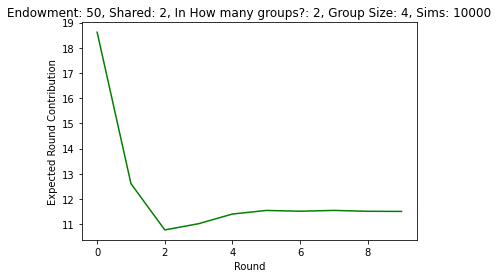

In [25]:
x = [i for i in range(NUM_ROUNDS)]
y = example_MC[1][:-1]
plt.title(f"Endowment: {ENDOWMENT}, Shared: {SHARED}, In How many groups?: {NUM_MEMBERSHIP}, Group Size: {GROUP_SIZE}, Sims: {SIMS}")
plt.xlabel("Round")
plt.ylabel("Expected Round Contribution")
plt.plot(x, y, color ="green")
plt.show()

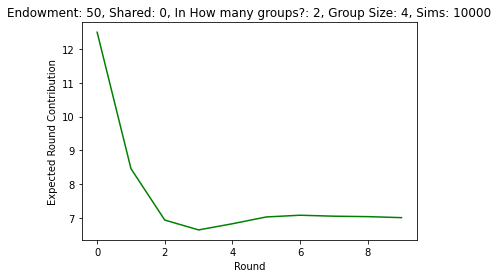

In [181]:
x1 = [i for i in range(NUM_ROUNDS)]
y1 = example_MC_2[1][:-1]
plt.title(f"Endowment: {ENDOWMENT}, Shared: {SHARED}, In How many groups?: {NUM_MEMBERSHIP}, Group Size: {GROUP_SIZE}, Sims: {SIMS}")
plt.xlabel("Round")
plt.ylabel("Expected Round Contribution")
plt.plot(x1, y1, color ="green")
plt.show()

#### Function Archive – No longer using, but did not feel safe enough to delete

In [ ]:
#def initailize_contribtions_with_player_types(NUM_PLAYERS, NUM_MEMBERSHIP, ENDOWMENT, SHARED, player_type_matrix):
   # initial_contributions = np.zeros([NUM_PLAYERS,NUM_MEMBERSHIP]) 
   # if SHARED:
""" for i in range(NUM_PLAYERS):
            initial_contribution_first_group = random.randint(0, ENDOWMENT)
            initial_contributions[i][0] = initial_contribution_first_group
            for j in range(1, NUM_MEMBERSHIP):
                successive_initial_contributions = random.randint(0,ENDOWMENT - initial_contribution_first_group)
                initial_contributions[i][j] = successive_initial_contributions
                initial_contribution_first_group += successive_initial_contributions"""